# MMAE 450 — Homework 3
## Transient Cooling of a Copper Sphere (FTCS vs Crank–Nicolson)

**Goal:** Implement the FTCS (explicit) method for transient cooling of a copper sphere with convection at the surface.

We solve the radially symmetric heat equation in a sphere:

\begin{equation}
\frac{\partial T}{\partial t} =
\alpha \left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial T}{\partial r}\right)\right],
\quad 0<r<R
\end{equation}

BCs:
- Center symmetry: $\left.\frac{\partial T}{\partial r}\right|_{r=0}=0$
- Convection at surface: $-k\left.\frac{\partial T}{\partial r}\right|_{r=R}=h(T(R,t)-T_\infty)$

IC:
- $T(r,0)=T_0$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [3]:
# --- Geometry / environment ---
R = 0.10                 # m
T0 = 100.0               # degC
T_inf = 20.0             # degC

# --- Copper properties (room temperature) ---
k = 401.0                # W/(m*K)
rho = 8960.0             # kg/m^3
cp = 385.0               # J/(kg*K)
alpha = k/(rho*cp)       # m^2/s

# --- Convection coefficient ---
h = 10.0                 # W/(m^2*K)

# --- Discretization ---
N = 60                   # number of radial intervals; nodes = N+1
dr = R / N
r = np.linspace(0.0,R,N+1)

## Discretization notes (what you implement)

We will discretize the radial diffusion operator

\begin{equation}
\mathcal{L}[T] = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial T}{\partial r}\right)
\end{equation}

\begin{equation}
\begin{aligned}
T_i^{n+1}
&=
T_i^n
+
\lambda\left(1+\frac{\Delta r}{r_i}\right)T_{i+1}^n
-2\lambda T_i^n \\
&\quad
+
\lambda\left(1-\frac{\Delta r}{r_i}\right)T_{i-1}^n,
\qquad
\lambda=\frac{\alpha\,\Delta t}{\Delta r^2}.
\end{aligned}
\end{equation}

\begin{align}
\rho c_p V\,\frac{\mathrm{d}T_0}{\mathrm{d}t} &= -qA,\\[4pt]
V=\frac{4}{3}\pi\left(\frac{\Delta r}{2}\right)^3,\qquad
A&=4\pi\left(\frac{\Delta r}{2}\right)^2,\\[4pt]
q &\approx -k\,\frac{T_1-T_0}{\Delta r}.
\end{align}

\begin{align}
\rho c_p\left[\frac{4}{3}\pi\left(\frac{\Delta r}{2}\right)^3\right]\frac{\mathrm{d}T_0}{\mathrm{d}t}
&=
k\,\frac{T_1-T_0}{\Delta r}
\left[4\pi\left(\frac{\Delta r}{2}\right)^2\right]\\
\Longrightarrow\quad
\frac{\mathrm{d}T_0}{\mathrm{d}t}
&=
6\alpha\,\frac{T_1-T_0}{\Delta r^2}.
\end{align}

\begin{equation}
T_0^{n+1}
=
T_0^n + 6\lambda\left(T_1^n - T_0^n\right),
\qquad
\lambda=\frac{\alpha\Delta t}{\Delta r^2}.
\end{equation}

In [4]:
# compute the time step 
lam = 0.1
dt = lam*dr**2/alpha

\begin{equation}
\begin{aligned}
T_i^{n+1}
&=
T_i^n
+
\lambda\left(1+\frac{\Delta r}{r_i}\right)T_{i+1}^n
-2\lambda T_i^n \\
&\quad
+
\lambda\left(1-\frac{\Delta r}{r_i}\right)T_{i-1}^n,
\qquad
\lambda=\frac{\alpha\,\Delta t}{\Delta r^2}.
\end{aligned}
\end{equation}

In [30]:
T = np.linspace(100.0,100.0,N+1)
T[N] = T_inf
# time loop
niter = 1000
for n in range(niter):
    T_new = T.copy()
    # enforce Neuman BC at r = 0 (ghost point method)
    T_new[0] = T[0]+6*lam*(T[1]-T[0])
    for i in range(1,N):
        ri = r[i]
        T_new[i] = T[i]+lam*(1+dr/ri)*T[i+1]-2*lam*T[i]+lam*(1-dr/ri)*T[i-1]
    # enforce Dirichlet BC
    T_new[N]=20.
    # advance solution in time
    T = T_new

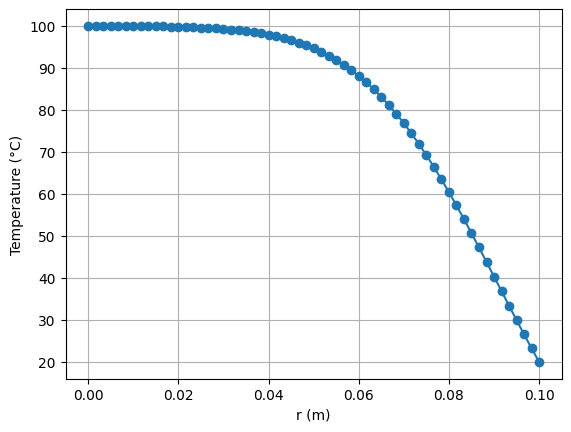

In [31]:
plt.figure()
plt.plot(r, T_new, 'o-', label="New (n+1)")
plt.xlabel("r (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()